# 전체 pow sum  -> soiling 자료 뽑기

In [3]:
#---- to do list -----
# err_data_list 파일자동화
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from tensorflow.python.keras.optimizer_v2.rmsprop import RMSProp
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, RepeatVector, LSTM, Input, TimeDistributed, Activation, Dropout
from keras.optimizers import SGD
np.set_printoptions(suppress=True)

#pow 낮값만 추출 test
#pow = 0인 구간 : 0~4, 21-23시
powhr_start = 5
powhr_end   = 20

shift_days  = 3
hoursteps   = powhr_end-powhr_start+1 #(16)
timesteps   = shift_days*hoursteps #hours step

data_dim    = 7
out_dim     = 1
n_model    = 10

data_dir  = 'C:/Users/VISLAB_PHY/Desktop/Workspace/Data'

season_mod = 'all_1102_f7'
date_start = '10190901'
date_end   = '30191201'

err_date_list = ['20190912',
                    '20191122',
                    '20191130',
                    '20191217',
                    '20200501',
                    '20200502',
                    '20191028',
                    '20191107',
                    '20191108',
                    '20191109',
                    '20191110',
                    '20191111',
                    '20191112',
                    '20200214',
                    '20200307',
                    '20200308',
                    '20200309',
                    '20200310',
                    '20200328',
                    '20200329',
                    '20200625',
                    '20200809']

# Get pow data

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer 
#from feature_engine import variable_transformers as vt
from scipy.stats import yeojohnson

#############################################
# 태양광 전력
#############################################
#def get_pow():

# pow 파일 load
dir_path    = data_dir+"/pow_24/UR00000126_csv"
file_list   = os.listdir(dir_path)
print(len(file_list))
hrPow  = []
hrDate = []

# pow측정값 에러가 큰 일자 제거
for filename in file_list:
    #if (filename[:-4] not in err_date_list):
    if ((filename[:-4]>=date_start) & (filename<date_end)):
        filedata = pd.read_csv(dir_path+'/'+filename).values[:,0]
        hrPow.append(filedata.sum())
        hrDate.append(filename[:-4])

#hrPow = list(zip(hrDate, hrPow))
#print(hrPow)
#print("filedata type : ", type(filedata))

# scale
#sc_pow = MinMaxScaler(feature_range = (0, 1))
#scaled_pow = sc_pow.fit_transform(pow_dataset.values)
#df_pow = pd.DataFrame(hrPow)
df_pow = pd.DataFrame(hrPow, index=hrDate, columns=['pow'])
print(df_pow)

#    return df_pow, sc_pow

df_pow.to_csv("C:/Users/VISLAB_PHY/Desktop/WORKSPACE/Origin/data/pow_test22.csv",mode='w',index=False)

337
             pow
20190820  389700
20190821  153400
20190822  263400
20190823  282200
20190824  314000
...          ...
20200805  129200
20200806   29700
20200807   26000
20200808   38900
20200809  342700

[337 rows x 1 columns]


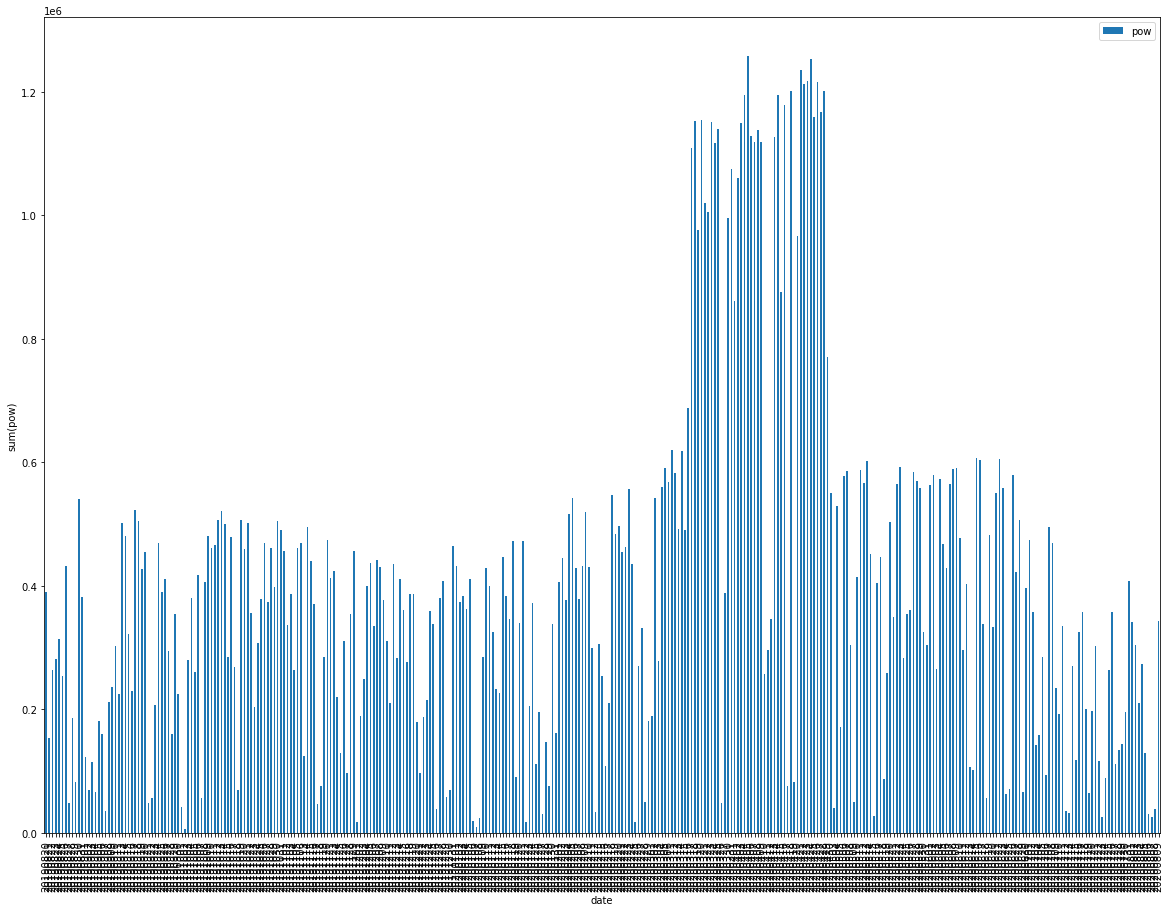

"\nfig, loss_ax = plt.subplots()\n\nloss_ax.plot(hrPow, 'y', label='train loss')\nloss_ax.set_xlabel('epoch')\nloss_ax.set_ylabel('loss')\nloss_ax.legend(loc='upper right')\nplt.show()\nprint('result : ', results)\n"

In [76]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt


ax = df_pow.plot.bar(figsize=(20, 15))#(bins=50, figsize=(20, 15))
ax.set_ylabel("sum(pow)")
ax.set_xlabel("date")
ax.legend()

plt.show()

'''
fig, loss_ax = plt.subplots()

loss_ax.plot(hrPow, 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')
plt.show()
print('result : ', results)
'''

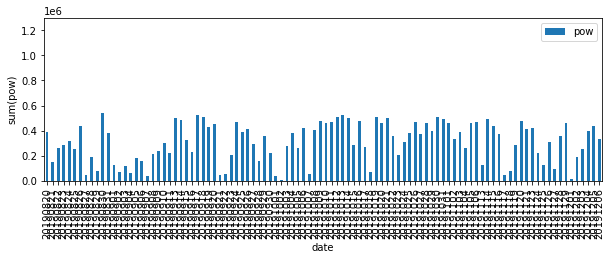

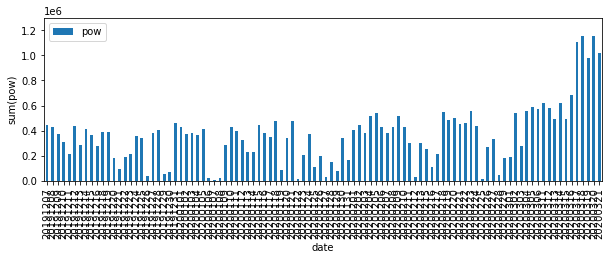

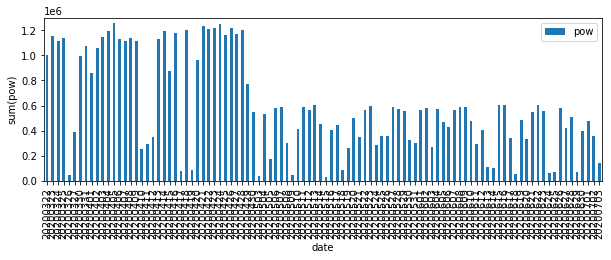

In [77]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

step = 100
for i in range(0, df_pow.shape[0]-step, step):
    ax = df_pow[i:i+step].plot.bar(figsize=(10, 3))#(bins=50, figsize=(20, 15))
    ax.set_ylabel("sum(pow)")
    ax.set_xlabel("date")
    ax.legend()
    plt.ylim(0,1300000)
    
plt.show()

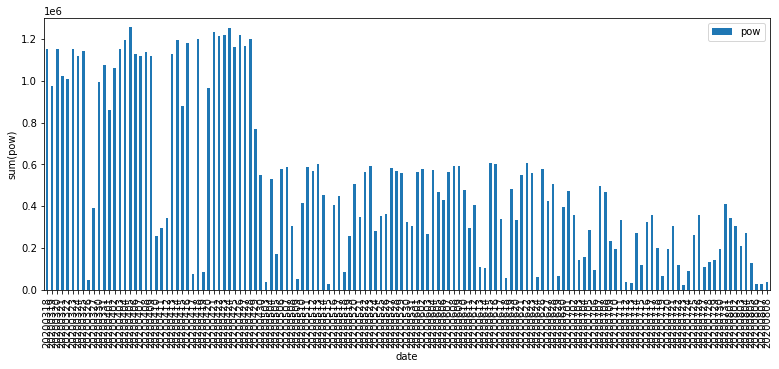

In [71]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

ax = df_pow[195:].plot.bar(figsize=(10, 5))#(bins=50, figsize=(20, 15))
ax.set_ylabel("sum(pow)")
ax.set_xlabel("date")
ax.legend()
plt.ylim(0,1300000)
plt.show()
